<a href="https://colab.research.google.com/github/AZFARHAD24511/AZFARHAD24511/blob/main/ML_models_comparison_%7C_Blends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Objective of this notebook is to model the data quickly and do various ML operations on data with different ML algorithms. It would be very useful in start of the competition to just look at how different models are performing with respect to each and with respect to different metrices, in order to plan a long term strategy for this competition.*

*I have also tested ensemble strategy with blends of different models in this notebook.*

*Before starting with this notebook, I would recommend to analyze the data and get some insights. Please refer to my notebook [Statistical Analysis: Univariate and Multivariate](https://www.kaggle.com/reverie5/statistical-analysis-univariate-multivariate) for the detailed analysis.*

![image.png](attachment:image.png)

*Image Credit: Google Images*

*Kindly refer to pycaret documentation [**PyCaret Documentation**](https://pycaret.readthedocs.io/en/latest/)*
*Also, check the pycaret official tutorials [**PyCaret Tutorials**](https://pycaret.readthedocs.io/en/latest/tutorials.html)*

### If you found this notebook useful, Kindly upvote :)

#### What is PyCaret??
#### PyCaret is an open source, low code ML library through which we can do end to end ML experiments through very few lines of code.

### Installation, load libraries and read data

*Start by installing PyCaret*

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.9 M

In [12]:
# Load libraries
import numpy as np
import pandas as pd

from pycaret.datasets import get_data
from pycaret.regression import *

In [3]:
# Load data in dataframes

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
from sklearn.model_selection import train_test_split

In [68]:
data  = pd.read_csv('USRealst.csv')
uszip=pd.read_csv("georef-united-states-of-america-zc-point@public.csv",sep=';')
merged_df = pd.merge(data, uszip[['Zip Code', 'Population', 'Density']], left_on='zip_code', right_on='Zip Code', how='left')
merged_df

,Unnamed: 0,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,Zip Code,Population,Density
0,0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,601.0,17113.0,102.7
1,1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,601.0,17113.0,102.7
2,2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,795.0,43873.0,366.2
3,3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,731.0,12657.0,102.4
4,4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,680.0,45190.0,271.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614293,614293,for_sale,NaN,NaN,0.20,Blytheville,Arkansas,72315.0,NaN,NaN,2950.0,72315.0,21609.0,33.1
614294,614294,for_sale,3.0,2.0,4.91,Blytheville,Arkansas,72315.0,1700.0,NaN,500000.0,72315.0,21609.0,33.1
614295,614295,for_sale,NaN,NaN,0.78,Ripley,Tennessee,38063.0,NaN,NaN,65000.0,38063.0,16277.0,20.6
614296,614296,for_sale,NaN,NaN,0.76,Ripley,Tennessee,38063.0,NaN,NaN,65000.0,38063.0,16277.0,20.6


In [69]:
data=merged_df

#data['price'] = data['price'].fillna(data['price'].mean())
from datetime import datetime
df = data.rename(columns={'prev_sold_date': 'date'})
df['date'] = pd.to_datetime(df['date'])
df['zip_code'] = df['zip_code'].astype(str)
#df['date'] = df.index
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day
df['weekofyear'] = df['date'].dt.weekofyear
df=df.dropna()
train, test = train_test_split(df, test_size=0.2, random_state=42)
train.shape, test.shape,df.shape

((158122, 21), (39531, 21), (197653, 21))

In [70]:
# check data

df.head()

,Unnamed: 0,status,bed,bath,acre_lot,city,state,zip_code,house_size,date,...,Zip Code,Population,Density,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
500,500,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,949.0,1192.0,2019-06-28,...,949.0,72943.0,1601.9,4.0,2.0,6.0,2019.0,179.0,28.0,26.0
3370,3370,for_sale,3.0,3.0,0.45,Agawam,Massachusetts,1001.0,2314.0,2014-06-25,...,1001.0,17312.0,581.0,2.0,2.0,6.0,2014.0,176.0,25.0,26.0
3371,3371,for_sale,3.0,2.0,0.36,Agawam,Massachusetts,1001.0,1276.0,2012-10-12,...,1001.0,17312.0,581.0,4.0,4.0,10.0,2012.0,286.0,12.0,41.0
3377,3377,for_sale,3.0,2.0,0.46,Agawam,Massachusetts,1001.0,1476.0,1986-11-20,...,1001.0,17312.0,581.0,3.0,4.0,11.0,1986.0,324.0,20.0,47.0
3383,3383,for_sale,3.0,2.0,1.76,Agawam,Massachusetts,1001.0,1968.0,2008-09-19,...,1001.0,17312.0,581.0,4.0,3.0,9.0,2008.0,263.0,19.0,38.0


### Preprocessing of dataset

In [71]:
wids_clf = setup(data=train,
                    target='price',
                    feature_selection = True,
                    remove_multicollinearity = True,
                    numeric_features = ['house_size','bed','bath','Population','Density'],
                 categorical_features=['zip_code','dayofweek',	'quarter',	'month',	'year',	'dayofyear'	,'dayofmonth'	,'weekofyear'],
                    ignore_features = ['Unnamed: 0', 'city', 'state','status','date','acre_lot','Zip Code'])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1507
[LightGBM] [Info] Number of data points in the train set: 110685, number of used features: 33
[LightGBM] [Info] Start training from score 628591.217753


,Description,Value
0,Session id,6483
1,Target,price
2,Target type,Regression
3,Original data shape,"(158122, 21)"
4,Transformed data shape,"(158122, 3)"
5,Transformed train set shape,"(110685, 3)"
6,Transformed test set shape,"(47437, 3)"
7,Ignore features,7
8,Numeric features,5
9,Categorical features,8


### Comparing ML Models

*Using cross validation strategy, 3 folds, sorted by AUC score.*

In [72]:
# lets check what different models we have
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [73]:

#best_model = compare_models(fold =3, sort = 'AUC')
best_model = compare_models(fold =3, sort = 'R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,277724.4239,1055992386356.4082,1010341.5183,0.4452,0.5660,8.0150,6.9633
knn,K Neighbors Regressor,276168.2292,1092582681258.6666,1029394.3958,0.4245,0.5565,6.5881,2.6633
rf,Random Forest Regressor,283216.7680,1152955670201.6204,1051899.0851,0.3960,0.5555,10.0152,25.3100
lightgbm,Light Gradient Boosting Machine,284661.2574,1180887446843.7178,1070272.0588,0.3786,0.5634,8.2068,3.5833
ridge,Ridge Regression,338115.6093,1230242943624.5234,1106595.0083,0.3438,0.8469,6.6101,2.1767
lr,Linear Regression,338115.6093,1230242943624.6438,1106595.0083,0.3438,0.8469,6.6101,4.2700
lasso,Lasso Regression,338115.6092,1230242943595.1077,1106595.0083,0.3438,0.8469,6.6101,2.4700
en,Elastic Net,338115.5965,1230242939173.5925,1106595.0062,0.3438,0.8469,6.6101,2.5467
llar,Lasso Least Angle Regression,338115.6092,1230242943595.0664,1106595.0083,0.3438,0.8469,6.6101,2.0533
lar,Least Angle Regression,338115.6093,1230242943624.6438,1106595.0083,0.3438,0.8469,6.6101,2.4133


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

### Create a specific ML model

*Although catboost is performing very good, but its taking so much time. Lets take lightgbm.*

*Version: 5 -> Trying catboost*

In [74]:
# Lets create a specific model
model = create_model('lightgbm', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,238036.2518,561880103408.3970,749586.6217,0.5567,0.4949,14.4245
1,247075.1841,1547856756791.1570,1244128.9149,0.4634,0.4873,0.4611
2,242902.1132,689902324074.7848,830603.5902,0.5365,0.5051,20.8953
3,248791.8735,905909417380.9900,951792.7387,0.5213,0.5090,10.6502
4,247064.8965,815380661503.3807,902984.3086,0.5507,0.4966,0.4774
Mean,244774.0638,904185852631.7419,935819.2348,0.5257,0.4986,9.3817
Std,3888.1403,342138048766.9748,168606.6796,0.0335,0.0077,7.9808


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Model plots

*Here I'm going to plot auc curve for our model with train and validation sets.*

In [78]:
gbr = create_model('gbr')
evaluate_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,337238.3522,994970481205.6840,997482.0706,0.2648,0.6639,33.6817
1,227249.7534,446509053743.1227,668213.3295,0.6219,0.4959,0.4805
2,337162.4014,2096172736549.8711,1447816.5411,0.2227,0.6479,0.7018
3,234374.8617,900828694784.6180,949119.9581,0.7067,0.4907,0.4699
4,236143.1743,665117206670.6108,815547.1824,0.5983,0.5118,41.3877
5,232000.5359,474135209613.7195,688574.7669,0.6411,0.5055,0.4931
6,245784.0689,729615411156.4341,854175.2813,0.6088,0.4988,0.4788
7,230961.8647,661704315342.7947,813452.0978,0.6553,0.5176,20.6432
8,246668.5053,758185803169.6779,870738.6538,0.6232,0.4996,0.4878


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

*Similary, we can plot different curves for model using plot_model function.*

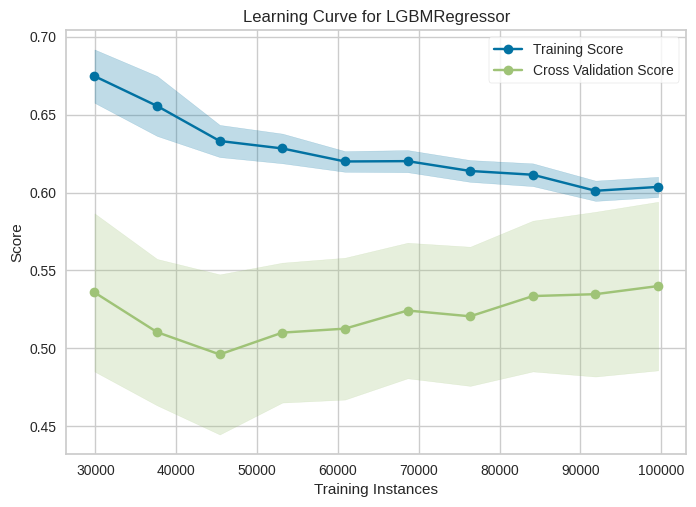

In [76]:
# Plotting classification report
plot_model(model, plot='learning')

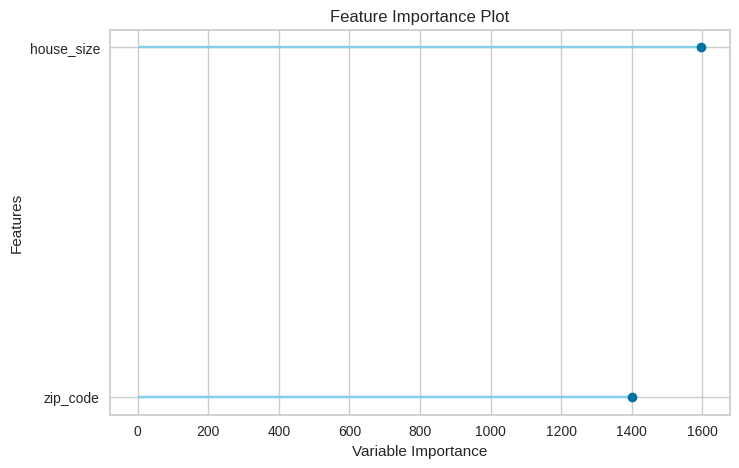

In [67]:
# Plotting feature importance
plot_model(model, plot='feature')

### Model evaluation

*Instead of plotting different curves for model, we can simply use function evaluate_model to plot different curves. It internally uses plot_model.*

In [ ]:
evaluate_model(model)

### Model Interpretation

*This returns an Interpretation plot based on train and validation set. It basically gives us SHAP values.*

[Refer here: More on SHAP](https://shap.readthedocs.io/en/latest/)

In [79]:
interpret_model(model)

ModuleNotFoundError: 
'shap' is a soft dependency and not included in the pycaret installation. Please run: `pip install shap` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

### Save and load Model

*Trained and tuned model can be saved as pickle file and loaded later. It basically saves the transformation pipeline and model object.*

In [ ]:
# Save model

save_model(model, 'model_wids')

In [ ]:
# load model
# load_model('model_wids')

### Model Predictions

*Predicting on test dataset for submission purpose.*

In [ ]:
predict_model(model)


In [ ]:
preds = predict_model(model, data= test)
preds.head()

In [ ]:
# Submission
test['diabetes_mellitus'] = 1 - preds['Score']
test[["encounter_id","diabetes_mellitus"]].to_csv("submission_lgbm.csv",index=False)

### Model Ensembling

*Blending is popular method of ensemble technique. The idea for blending is very simple. Its like taking into account the opinion of multiple models and come out with a single solution. Similar to voting.*

*In blending for classification problem, we take average of predicted probabilites by each model.*

*Example: preds_final = (preds_by_model1 + preds_by_model2 + preds_by_model3)/3*

In [ ]:
# We already have one model lightgbm (model), lets create two more models
xgboost = create_model('xgboost', fold =3)

In [ ]:
catboost = create_model('catboost', fold =3)

*Lets first combine lgbm and catboost for our first blend.*

In [ ]:
# Using blend function in pycaret
# model for lightgbm model
blended_model1 = blend_models(estimator_list = [model,catboost], method = 'soft', fold=3)

*Methods: Soft for predicted probabilites, Hard for labels (0,1)*

In [ ]:
# Check plots for blended model
# Plotting auc curve
plot_model(blended_model1, plot = 'auc')

*Now lets prepare a second blend using 3 model, catboost, lightgbm and xgboost.*

In [ ]:
blended_model2 = blend_models(estimator_list = [model,catboost, xgboost], method = 'soft', fold=3)

In [ ]:
# Check plots for blended model
# Plotting auc curve
plot_model(blended_model2, plot = 'auc')

### Predicting on test data using blended models

*Lets predict from unseen test data from blended model for submission*

In [ ]:
preds_blend1 = predict_model(blended_model1, data= test)
# Submission
test['diabetes_mellitus'] = 1 - preds_blend1['Score']
test[["encounter_id","diabetes_mellitus"]].to_csv("submission_blend1.csv",index=False)

In [ ]:
preds_blend2 = predict_model(blended_model2, data= test)
# Submission
test['diabetes_mellitus'] = 1 - preds_blend2['Score']
test[["encounter_id","diabetes_mellitus"]].to_csv("submission_blend2.csv",index=False)

*I will keep updating this notebook to include more useful techniques.*

### Thank you.